In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datadotworld as ddw
import time

In [25]:
insDF = pd.read_csv('insurance.csv')
insDF
#m - 0, f - 1 s = 0, ns = 1 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
insDF.sex = insDF.sex.apply(lambda x: int(0 if x == "male" else 1))
insDF.smoker = insDF.smoker.apply(lambda x: int(0 if x == "no" else 1))

rSet = (set)(insDF.region.values)

cnt = 0
for i in rSet:
    insDF.loc[insDF['region'] == i, ['region']] = cnt
    cnt+=1
insDF
for i in insDF:

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [27]:
insF = insDF.loc[insDF['sex'] == 0]
insM = insDF.loc[insDF['sex'] == 1]

ins = {
    'F': {
        'S': insF.loc[insF['smoker'] == 0],
        'N': insF.loc[insF['smoker'] == 1],
    },
    'M' : {
        'S': insM.loc[insM['smoker'] == 0],
        'N': insM.loc[insM['smoker'] == 1],
    },
}
ins

{'F': {'S':       age  sex     bmi  children  smoker region      charges
  1      18    0  33.770         1       0      1   1725.55230
  2      28    0  33.000         3       0      1   4449.46200
  3      33    0  22.705         0       0      3  21984.47061
  4      32    0  28.880         0       0      3   3866.85520
  8      37    0  29.830         2       0      0   6406.41070
  ...   ...  ...     ...       ...     ...    ...          ...
  1324   31    0  25.935         1       0      3   4239.89265
  1325   61    0  33.535         0       0      0  13143.33665
  1327   51    0  30.030         1       0      1   9377.90470
  1329   52    0  38.600         2       0      2  10325.20600
  1333   50    0  30.970         3       0      3  10600.54830
  
  [517 rows x 7 columns],
  'N':       age  sex     bmi  children  smoker region      charges
  14     27    0  42.130         0       1      1  39611.75770
  19     30    0  35.300         0       1      2  36837.46700
  29     31

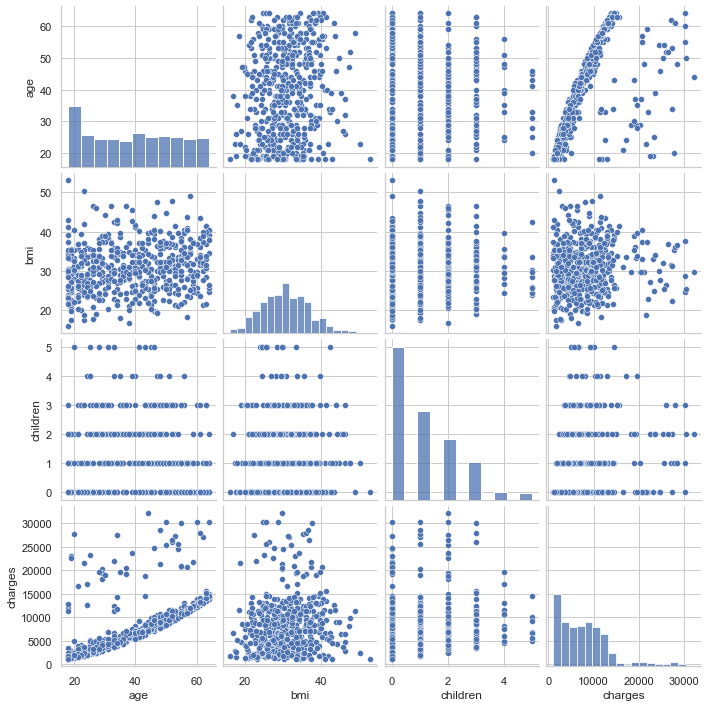

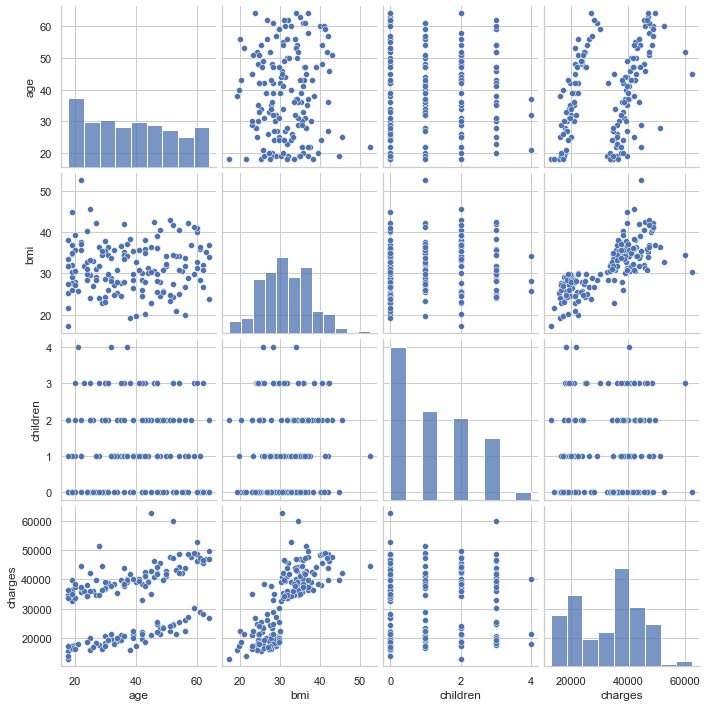

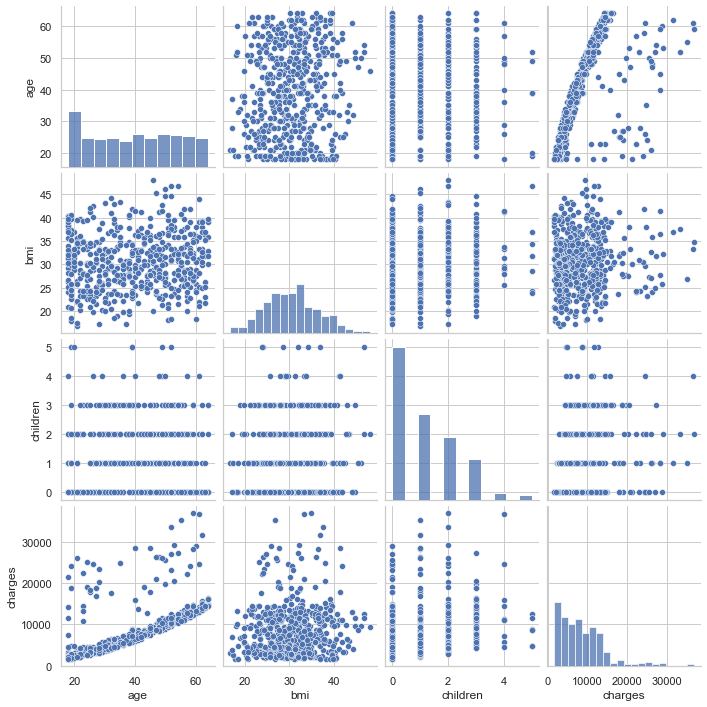

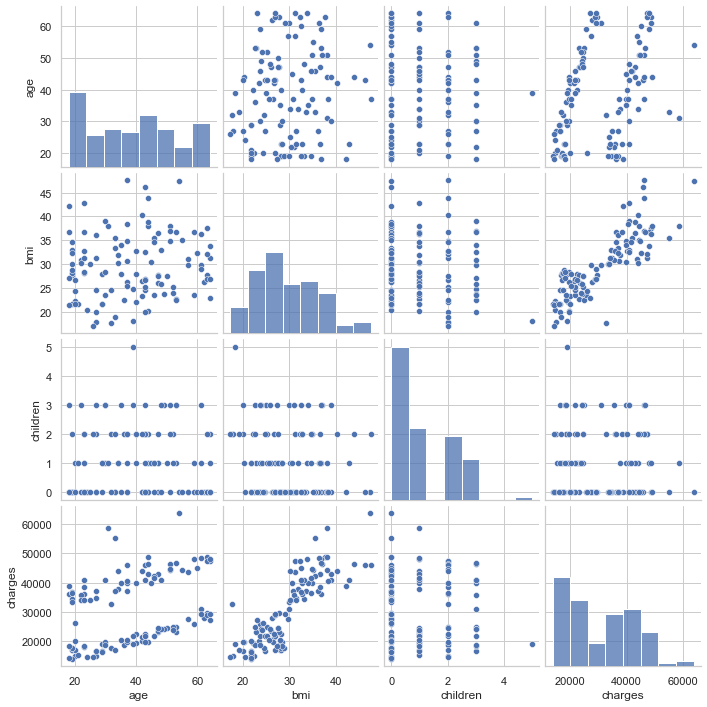

In [28]:
for sex in ins.keys():
    for smoker in ins[sex].keys():
        sns.set(style='whitegrid', context='notebook')
        sns.pairplot(ins[sex][smoker][['age', 'bmi', 'children', 'charges']])
        plt.show()

In [32]:
cm = np.corrcoef(insDF.values.T)

AttributeError: 'float' object has no attribute 'shape'